In [1]:
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_anage = pl.read_csv("../data/anage.csv", infer_schema_length=1000)
df_earthquakes = pl.read_csv("../data/EarthquakesChile_2000-2024.csv", try_parse_dates=True).with_columns(
    Year=pl.col("Date").dt.year(),
    Month=pl.col("Date").dt.month(),
)

In [3]:
df_anage.head()

HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
i64,str,str,str,str,str,str,str,str,i64,i64,i64,str,f64,f64,i64,f64,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,str
3,"""Animalia""","""Arthropoda""","""Branchiopoda""","""Diplostraca""","""Daphniidae""","""Daphnia""","""pulicaria""","""Daphnia""",null,null,null,null,null,null,null,null,null,null,null,0.19,null,"""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""1294,1295,1296"""
5,"""Animalia""","""Arthropoda""","""Insecta""","""Diptera""","""Drosophilidae""","""Drosophila""","""melanogaster""","""Fruit fly""",7,7,null,null,null,null,null,null,null,null,null,0.3,null,"""captivity""","""large""","""acceptable""",0.05,0.04,null,null,null,"""2,20,32,47,53,68,69,240,241,24…"
6,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Apidae""","""Apis""","""mellifera""","""Honey bee""",null,null,null,null,null,null,null,null,null,null,null,8.0,"""812""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""63,407,408,741,805,806,808,812…"
8,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Cardiocondyla""","""obscurior""","""Cardiocondyla obscurior""",null,null,null,null,null,null,null,null,null,null,null,0.5,"""1293""","""captivity""","""medium""","""acceptable""",null,null,null,null,null,"""1293"""
9,"""Animalia""","""Arthropoda""","""Insecta""","""Hymenoptera""","""Formicidae""","""Lasius""","""niger""","""Black garden ant""",null,null,null,null,null,null,null,null,null,null,null,28.0,"""411""","""unknown""","""medium""","""acceptable""",null,null,null,null,null,"""411,813,814"""


In [4]:
df_earthquakes.head()

UTC_Date,Profoundity_Km,Magnitude_Ml,Date,Hour,Location,Region,Latitude,Longitude,Year,Month
datetime[μs],f64,f64,date,time,str,str,f64,f64,i32,i8
2024-03-01 16:35:22,243.0,2.9,2024-03-01,13:35:22,"""45 km al SE de Socaire""","""Antofagasta""",-23.958,-67.698,2024,3
2024-03-01 15:41:03,259.0,3.6,2024-03-01,12:41:03,"""57 km al E de Socaire""","""Antofagasta""",-23.8,-67.375,2024,3
2024-03-01 08:27:13,26.0,2.9,2024-03-01,05:27:13,"""33 km al S de Huasco""","""Atacama""",-28.755,-71.288,2024,3
2024-03-01 08:22:21,54.0,3.7,2024-03-01,05:22:21,"""49 km al SO de Huasco""","""Atacama""",-28.822,-71.52,2024,3
2024-03-01 07:12:58,20.0,2.9,2024-03-01,04:12:58,"""16 km al SE de Los Vilos""","""Coquimbo""",-31.991,-71.376,2024,3


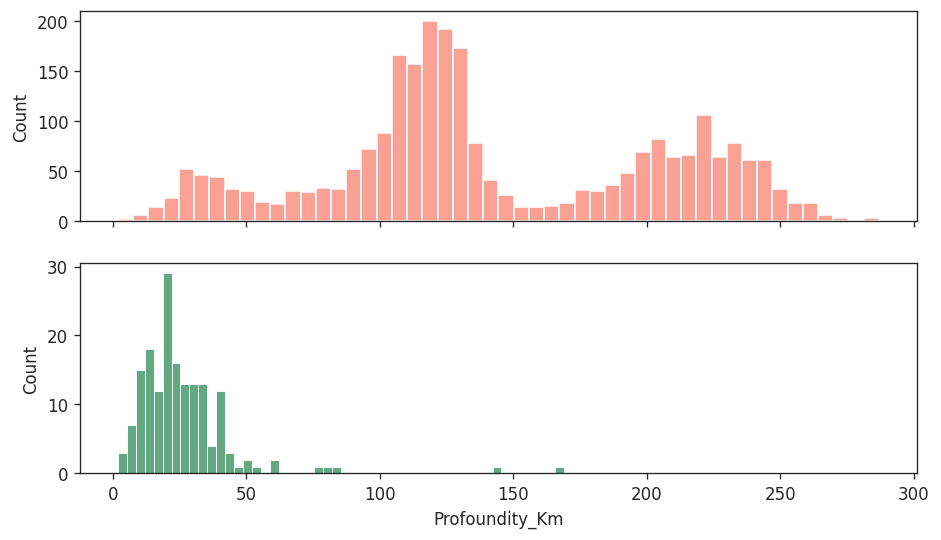

In [5]:
with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(9, 5), dpi=120, sharex=True)
    sns.histplot(
        data=df_earthquakes.filter(Region = "Antofagasta", Year = 2020),
        x="Profoundity_Km",
        color="salmon",
        bins=50,
        ax=ax1
    )
    sns.histplot(
        data=df_earthquakes.filter(Region = "Bío-Bío", Year = 2020),
        x="Profoundity_Km",
        color="seagreen",
        bins=50,
        ax=ax2
    )

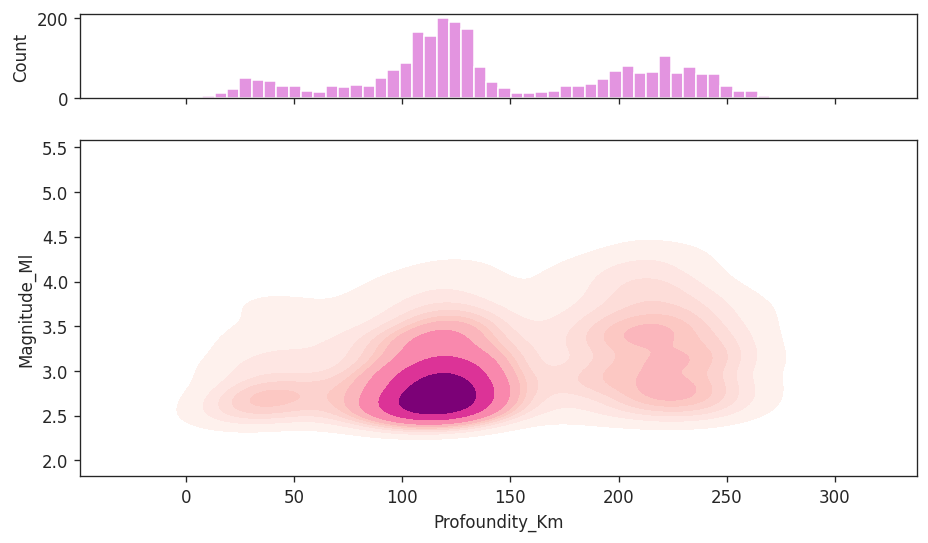

In [6]:
with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(
        nrows=2,
        height_ratios=(1, 4),
        figsize=(9, 5),
        dpi=120,
        sharex=True,
    )
    sns.histplot(
        data=df_earthquakes.filter(Region="Antofagasta", Year=2020),
        x="Profoundity_Km",
        color="orchid",
        bins=50,
        ax=ax1,
    )
    sns.kdeplot(
        data=df_earthquakes.filter(Region="Antofagasta", Year=2020),
        x="Profoundity_Km",
        y="Magnitude_Ml",
        cmap="RdPu",
        fill=True,
        ax=ax2,
    )

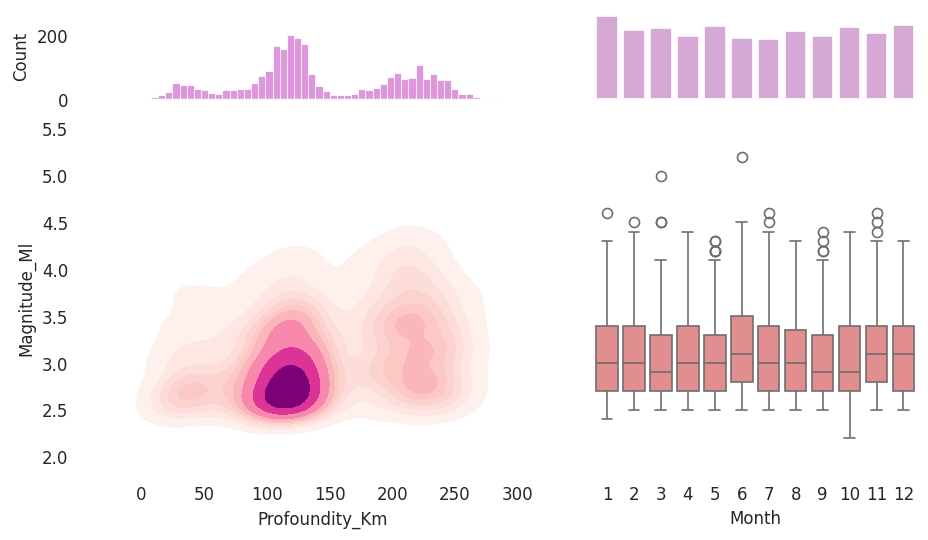

In [7]:
with sns.axes_style("dark", {'axes.facecolor': 'white'}):
    fig, axs = plt.subplots(
        nrows=2,
        ncols=2,
        height_ratios=(1, 4),
        width_ratios=(1.5, 1),
        figsize=(9, 5),
        dpi=120,
        sharex="col",
        sharey="row",
    )
    plt.subplots_adjust(wspace=0.07, hspace=0.1)

    sns.histplot(
        data=df_earthquakes.filter(Region="Antofagasta", Year=2020),
        x="Profoundity_Km",
        color="orchid",
        bins=50,
        ax=axs[0, 0],
    )
    sns.kdeplot(
        data=df_earthquakes.filter(Region="Antofagasta", Year=2020),
        x="Profoundity_Km",
        y="Magnitude_Ml",
        cmap="RdPu",
        fill=True,
        ax=axs[1, 0],
    )

    sns.countplot(
       data=df_earthquakes.filter(Region="Antofagasta", Year=2020), 
       x="Month",
       color="plum",
       ax=axs[0, 1]
    )

    sns.boxplot(
        data=df_earthquakes.filter(Region="Antofagasta", Year=2020),
        x="Month",
        y="Magnitude_Ml",
        color="lightcoral",
        ax=axs[1, 1]
    )

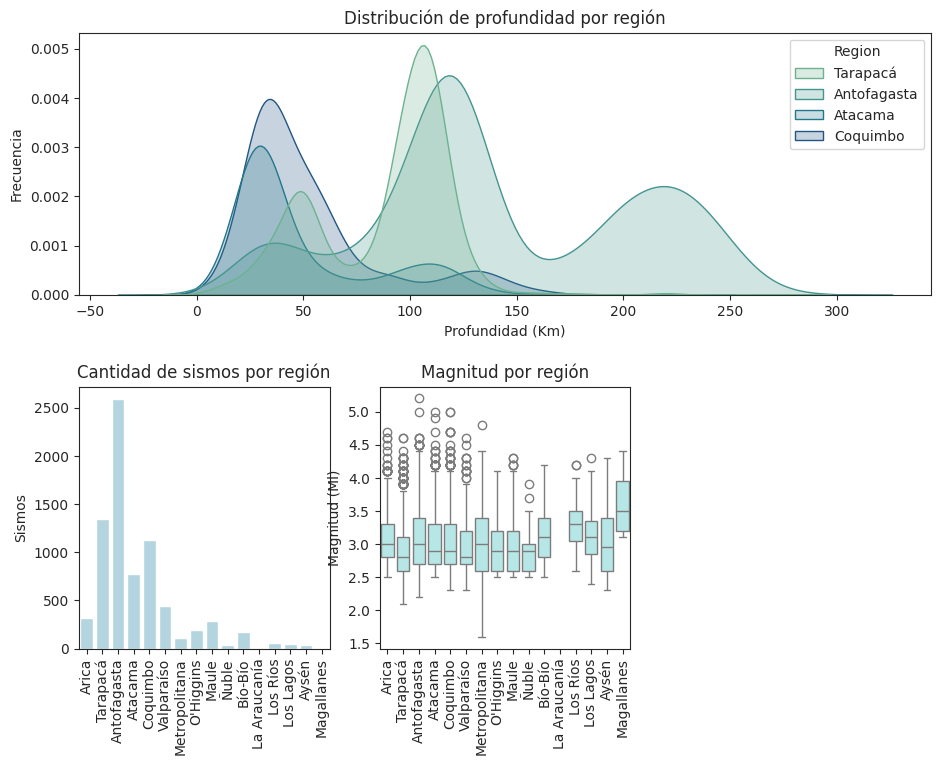

In [8]:
regions_sorted = [
    "Arica",
    "Tarapacá",
    "Antofagasta",
    "Atacama",
    "Coquimbo",
    "Valparaíso",
    "Metropolitana",
    "O'Higgins",
    "Maule",
    "Ñuble",
    "Bío-Bío",
    "La Araucanía",
    "Los Ríos",
    "Los Lagos",
    "Aysén",
    "Magallanes",
]
 
df_earthquakes_2020 = df_earthquakes.filter(
    pl.col("Date").dt.year() == 2020,
).with_columns(
    # Simplificar nombres de regiones
    pl.col("Region").replace(
        {
            "Arica y Parinacota": "Arica",
            "Libertador General Bernardo O'Hi": "O'Higgins",
            "Aysén del General Ibañez del Cam": "Aysén",
            "Magallanes y Antártica Chilena": "Magallanes",
            "Santiago Metropolitan": "Metropolitana",
        }
    )
)
 
with sns.axes_style("ticks"):
    # Definir el layout: 'A' ocupa toda la fila superior,
    # 'B' y 'C' se dividen la fila inferior
    fig, axs = plt.subplot_mosaic(
        [
            ["A", "A", "A"],  # Primera fila: subplot A ocupa ambas columnas
            ["B", "C", "."],  # Segunda fila: subplots B y C, uno en cada columna
        ],
        figsize=(11, 8),
    )
    plt.subplots_adjust(hspace=0.35, wspace=0.2)
 
    # Gráfico superior (A): Histograma general
    sns.kdeplot(
        data=df_earthquakes_2020.filter(
            pl.col("Region").is_in(["Tarapacá", "Antofagasta", "Atacama", "Coquimbo"]),
        ),
        x="Profoundity_Km",
        hue="Region",
        hue_order=["Tarapacá", "Antofagasta", "Atacama", "Coquimbo"],
        palette="crest",
        ax=axs["A"],
        fill=True,
    ).set(
        title="Distribución de profundidad por región",
        ylabel="Frecuencia",
        xlabel="Profundidad (Km)",
    )
 
    # Gráfico inferior derecho (V): Countplot
    sns.countplot(
        data=df_earthquakes_2020,
        x="Region",
        order=regions_sorted,
        color="lightblue",
        ax=axs["B"],
    ).set(title="Cantidad de sismos por región", ylabel="Sismos", xlabel="")
    axs["B"].tick_params(axis="x", rotation=90)
 
    # Gráfico inferior izquierdo (C): Boxplot
    sns.boxplot(
        data=df_earthquakes_2020,
        x="Region",
        y="Magnitude_Ml",
        order=regions_sorted,
        color="paleturquoise",
        ax=axs["C"],
    ).set(title="Magnitud por región", ylabel="Magnitud (Ml)", xlabel="")
    axs["C"].tick_params(axis="x", rotation=90)

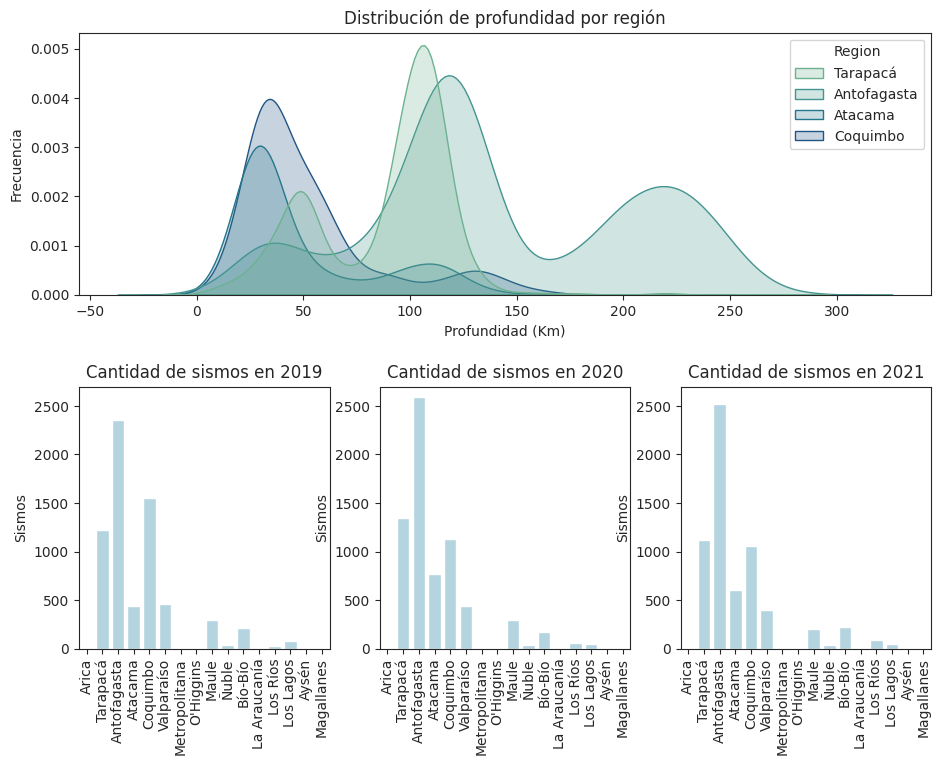

In [ ]:
regions_sorted = [
    "Arica",
    "Tarapacá",
    "Antofagasta",
    "Atacama",
    "Coquimbo",
    "Valparaíso",
    "Metropolitana",
    "O'Higgins",
    "Maule",
    "Ñuble",
    "Bío-Bío",
    "La Araucanía",
    "Los Ríos",
    "Los Lagos",
    "Aysén",
    "Magallanes",
]
 
df_earthquakes_2020 = df_earthquakes.filter(
    pl.col("Date").dt.year() == 2020,
).with_columns(
    pl.col("Region").replace(
        {
            "Arica y Parinacota": "Arica",
            "Libertador General Bernardo O'Hi": "O'Higgins",
            "Aysén del General Ibañez del Cam": "Aysén",
            "Magallanes y Antártica Chilena": "Magallanes",
            "Santiago Metropolitan": "Metropolitana",
        }
    )
)
 
with sns.axes_style("ticks"):
    fig, axs = plt.subplot_mosaic(
        [
            ["A", "A", "A"],
            ["B", "C", "D"],
        ],
        figsize=(11, 8),
    )
    plt.subplots_adjust(hspace=0.35, wspace=0.2)
 
    sns.kdeplot(
        data=df_earthquakes_2020.filter(
            pl.col("Region").is_in(["Tarapacá", "Antofagasta", "Atacama", "Coquimbo"]),
        ),
        x="Profoundity_Km",
        hue="Region",
        hue_order=["Tarapacá", "Antofagasta", "Atacama", "Coquimbo"],
        palette="crest",
        ax=axs["A"],
        fill=True,
    ).set(
        title="Distribución de profundidad por región",
        ylabel="Frecuencia",
        xlabel="Profundidad (Km)",
    )
 
    for panel, year in zip(["B", "C", "D"], [2019, 2020, 2021]):
        sns.countplot(
            data=df_earthquakes.filter(pl.col("Year") == year),
            x="Region",
            order=regions_sorted,
            color="lightblue",
            ax=axs[panel],
        ).set(title=f"Cantidad de sismos en {year}", ylabel="Sismos", xlabel="")
        axs[panel].tick_params(axis="x", rotation=90)
        axs[panel].set_ylim(0, 2700)